In [2]:
### DONT RUN
import gzip
import lzma as xz
# raindata = gzip.open("./12dec19-gzips/2019-10-17T17_30_16Z_rainbowagents_data.json.gz")
# raindata = gzip.open("./2019-09-03T02_44_46Z_rainbowagents_data.json.gz")
raindata = xz.open("./jan16-export.xz")
rd = raindata.read()
import json
hd = json.loads(rd)

In [3]:
len(hd)

37388

In [101]:
aug23r2 = {}
list(hd.values())[0]["timeEpoch"]
for d in hd:
    if hd[d]["timeEpoch"] > 1566586800 and hd[d]["timeEpoch"] < 1566590400:
        aug23r2[d] = hd[d]
        

In [117]:
f =  open("case4.json", "w")
json.dump(aug23r2, f)
f.close()

In [107]:
ar2 = pd.io.json.json_normalize(aug23r2.values())

In [110]:
ar2.to_csv("case4.csv")

In [121]:
max(ar2["timeUTC"]) < "2019-08-24T08:00:00"

True

In [29]:
import datetime

dtstr = list(hd.values())[0]["timeUTC"]
print(datetime.datetime.strptime(dtstr, '%Y-%m-%dT%H:%M:%S'))
datetime.datetime.strptime(dtstr, '%Y-%m-%dT%H:%M:%S') - datetime.timedelta(hours = 8)
# > '2019-08-16T02:57:00'

2019-08-16 02:55:26


datetime.datetime(2019, 8, 15, 18, 55, 26)

In [18]:
aug23 = {}
shiftedaug23 ={}
augweek = {}
for d in hd:
    if hd[d]["timeUTC"] > "2019-08-23T08:00:00" and hd[d]["timeUTC"] < "2019-08-24T08:00:00":
#     if hd[d]["timeUTC"][8:10] == "23":
#     if hd[d]["timeUTC"][8:10] == "23" or hd[d]["timeUTC"][8:10] == "22" or hd[d]["timeUTC"][8:10] == "24":
        hd[d]["dateTime"] = datetime.datetime.strptime(dtstr, '%Y-%m-%dT%H:%M:%S') - datetime.timedelta(hours = 8)
#         augweek[d] = hd[d]
        aug23[d] = hd[d]

In [19]:
# shiftedaug23 = aug23
len(augweek)

88497

In [8]:
json.dump(aug23, open("aug23unshifted.json", "w"))

In [ ]:
# len(list(hd.values()))
len(hd)

In [99]:
min(alldf["timeEpoch"])

1566604806

In [69]:
#####  RUN FROM HERE!!!
import lzma
import json
aug23 = json.loads((lzma.open('aug23.json.xz')).read())

In [70]:
len(aug23)

34046

In [4]:
import pandas as pd
alldf = pd.io.json.json_normalize(list(hd.values()))

In [5]:
import pandas as pd
# alldf = pd.io.json.json_normalize(list(hd.values()))
# alldf = pd.io.json.json_normalize(list(aug23.values()))
# alldf = pd.io.json.json_normalize(list(augweek.values()))
alldf["date"] = alldf["timeUTC"].str.slice(0,10)
len(alldf)

37388

In [7]:
df = alldf
print(df[df["date"].str.match('2020-01-16') & df["siteName"].str.match('NYSCI')]["eventKey"].value_counts())
print(df["date"].unique())
print(df["eventKey"].unique())

FlagMoved                 67
CurrentScreenChanged      35
CreatureStateChanged      35
CardPlacedInMachine       27
PlantStateChanged         26
CreatureSelected          20
PlantPlanted              17
PlantWatered              16
CreatureUnlocked          10
FlagPlaced                 9
SeedPacketCountChanged     9
TreasureSpawned            7
CreatureDeselected         7
CreatureDespawned          7
CreatureSpawned            7
TreasureOpened             6
FlagCancelled              4
RainbowPlantPlanted        3
GameStart                  3
MushroomOrbFilled          2
CardSwapped                1
AllOrbsFilled              1
LeafyOrbFilled             1
WoodyOrbFilled             1
Name: eventKey, dtype: int64
['2020-01-13' '2020-01-14' '2020-01-15' '2020-01-16']
['GameStart' 'CreatureUnlocked' 'TreasureSpawned' 'TreasureDespawned'
 'CreatureSelected' 'FlagMoved' 'FlagPlaced' 'CurrentScreenChanged'
 'FlagCancelled' 'CardPlacedInMachine' 'CreatureSpawned'
 'CreatureStateChanged' 'P

In [9]:
print(min(df[df["siteName"].str.match('NYSCI')]["timeUTC"]))
print(max(df[df["siteName"].str.match('NYSCI')]["timeUTC"]))

In [9]:
nyscidf = 

2020-01-16T17:55:32
2020-01-16T18:13:30


In [75]:
# print(alldf[alldf["date"].str.match('2019-07-01') & alldf["siteName"].str.match('NYSCI')]["eventKey"].value_counts())
# print(alldf["date"].unique())
print(alldf["eventKey"].unique())
print(alldf["timeUTC"].max())
print(alldf["timeUTC"].min())
print(alldf["date"].unique())
print(alldf["siteName"].unique())

['PlantWatered' 'CreatureStateChanged' 'PlantStateChanged'
 'TreasureDespawned' 'TreasureSpawned' 'GameStart' 'CreatureUnlocked'
 'CreatureSelected' 'FlagMoved' 'FlagPlaced' 'CurrentScreenChanged'
 'CardPlacedInMachine' 'CreatureSpawned' 'PlantPlanted'
 'CreatureDeselected' 'CreatureDespawned' 'LeafyOrbFilled'
 'CreatureLocked' 'MushroomOrbFilled' 'TreasureOpened'
 'SeedPacketCountChanged' 'FlagCancelled' 'WoodyOrbFilled' 'AllOrbsFilled'
 'CardPlacedInTray' 'CardSwapped' 'RainbowPlantPlanted']
2019-08-24T23:59:59
2019-08-24T00:00:06
['2019-08-24']
['Lawrence']


In [76]:
actionsdf = alldf[alldf["eventKey"].isin(["FlagMoved", "FlagPlaced", "CurrentScreenChanged", "CreatureSelected", "CardPlacedInTray", "FlagCancelled" "CardPlacedInMachine", "CardSwapped"])]

In [77]:
len(actionsdf)

12581

In [78]:
for d in alldf["date"].unique():
    print(d, len(alldf[alldf["date"] == d]))

2019-08-24 34046


In [79]:
alldf[alldf["eventType"] == "GameConfiguration"]["eventKey"].unique()

array(['GameStart'], dtype=object)

In [80]:
from plotly.offline import iplot
import plotly.graph_objs as go
import numpy as np
import plotly.express as px

In [ ]:
import plotly.io as pio
pio.renderers


In [ ]:
p1Screens = px.scatter(x= actionsdf["timeUTC"], y = actionsdf["player1CurrentScreen"])
p2Screens = px.scatter(x= actionsdf["timeUTC"], y = actionsdf["player2CurrentScreen"])

In [22]:
p1Screens = go.Scattergl(x= actionsdf["timeUTC"], y = actionsdf["player1CurrentScreen"], mode = "markers", opacity = 0.5)
p2Screens = go.Scattergl(x= actionsdf["timeUTC"], y = actionsdf["player2CurrentScreen"], mode = "markers", opacity = 0.5)

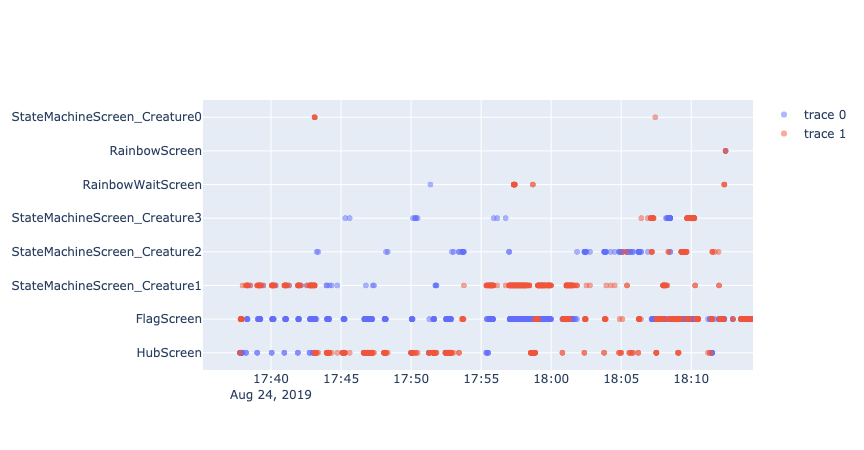

In [23]:
iplot([p1Screens, p2Screens])

In [ ]:
########Code to look for logs from specific event types############
# PlantPlanted, PlantWatered, CreatureStateChanged
for d in aug23:
    if aug23[d]["eventKey"] == "CardSwapped":
#     if aug23[d]["player1Creature2"]["usedCards"] != 'null':
        break
aug23[d]

In [60]:
########Code to search for column names############
alldf.columns
for c in alldf.columns:
    if "correctNeighbors" in c:
        print(c)

treasure.0.correctNeighbors
treasure.0.incorrectNeighbors
treasure.1.correctNeighbors
treasure.1.incorrectNeighbors
treasure.2.correctNeighbors
treasure.2.incorrectNeighbors


In [77]:
# print(alldf["player2Creature3.trayCards.0"].unique())
# print(alldf["player2Creature3.trayCards.1"].unique())
# print(alldf["player2Creature3.trayCards.2"].unique())

print(alldf["player2Creature1.usedCards.0"].unique())

In [82]:
# print(alldf[""])
df = alldf

subdf = df[df["eventKey"].str.match("CurrentScreenChanged")]
stateChangedf = df[df["eventKey"] == "CreatureStateChanged"]
creatureSpawndf = df[df["eventKey"] == "CreatureSpawned"]
treasureOpendf = df[df["eventKey"] == "TreasureOpened"]
cardDf = df[df["eventKey"] == "CardPlacedInMachine"]
flagDf = df[df["eventKey"] == "FlagMoved"]

print(len(subdf))
print(len(stateChangedf))
print(len(treasureOpendf))
print(len(cardDf))
print(len(flagDf))

1518
6680
35
1562
9066


In [83]:
flagDf[:1]

,activeCreatureCount,eventKey,eventType,eventUniqueId,gameVersion,gardenPercentageFilled,leafyCount,logVersion,mushroomCount,orbLeafyCount,...,plants.161.y,plants.162.creatureWhoPlanted,plants.162.id,plants.162.lastWateredBy,plants.162.plantState,plants.162.plantType,plants.162.playerWhoPlanted,plants.162.x,plants.162.y,date
3939,0.0,FlagMoved,GameEvent,323645e6-2b0d-442b-9567-2597238d511d,1.1,0.015,0.0,1.1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-24


In [84]:
len(cardDf)

1562

In [85]:
n = "player1Creature2.trayCards"
o = "player1Creature2.usedCards"
n[21:26]
o[21:26]

'Cards'

In [29]:
# timestamp, p1c1.0-2, p1c2.0-n, ... p2c3.0-n
cols = []
for c in cardDf.columns:
    if c.find("usedCards") > -1:
        cols.append(c)

In [37]:
cardDf[cols].to_csv("cardDf.csv")

In [ ]:
###### RUN THIS FOR CREATURE CARD PLACEMENT
import math
for i in list(range(100))[1:]:
    for c in cardDf.iloc[2].keys():
        if (c[7:15] == "Creature") and (c[21:26] == "Cards"):
            f = cardDf.iloc[i - 1][c]
            g = cardDf.iloc[i][c]
    #         print(str(f))
            if str(f) != "nan" or str(g) != "nan":
                if f != g:
                    print (c + ": " + str(g) + " & " + str(f))
    print(i)
#     if ()
#     print(cardDf.iloc[1][c])
# for c in cardDf.iloc[1]:
#     print(c)
    
    

In [ ]:
timeGaps = df[df["eventKey"].str.match("FlagMoved") | df["eventKey"].str.match("CardPlacedInMachine")]["timeEpoch"].diff()
# binCount = 
ct = pd.cut(timeGaps, 300)
bins = timeGaps.groupby(ct).count()
bb = bins.tolist()

gaps = {"x": list(range(len(bb))), "y": bb}

# iplot([gaps], filename='time gaps histogram')
fig = go.Figure([gaps])
fig.show()

In [13]:
plantDf = df[df["eventKey"] == "PlantPlanted"]

In [93]:
plantCols

['player1Creature1.plantsPlanted',
 'player1Creature2.plantsPlanted',
 'player1Creature3.plantsPlanted',
 'player2Creature1.plantsPlanted',
 'player2Creature2.plantsPlanted',
 'player2Creature3.plantsPlanted']

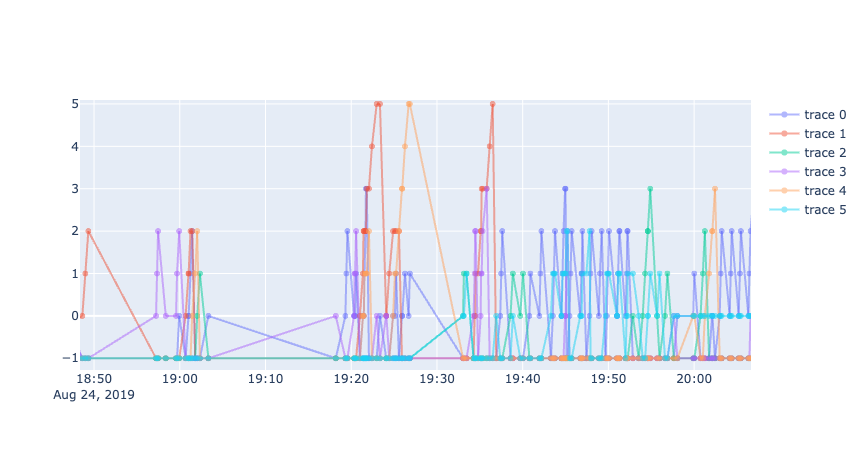

In [95]:
plantCols = []
for c in df.columns:
    if 'plantsPlanted' in c:
        plantCols.append(c)

def pcplot(col):
    return go.Scattergl(x= plantDf["timeUTC"], y = plantDf[col], mode = "lines+markers", opacity = 0.5)

plt = []
for c in plantCols:
        plt.append(pcplot(c))
# p1c1 = go.Scattergl(x= plantDf["timeUTC"], y = actionsdf["player1Creature1.plantsPlanted"], mode = "markers", opacity = 0.5)
# p1c2 = go.Scattergl(x= plantDf["timeUTC"], y = actionsdf["player2CurrentScreen"], mode = "markers", opacity = 0.5)
# plantDf[plantCols]
iplot(plt)


In [87]:
plantCols = []
for c in df.columns:
    if 'correctNeighbors' in c:
        plantCols.append(c)

plantDf[plantCols]

,treasure.0.correctNeighbors,treasure.0.incorrectNeighbors,treasure.1.correctNeighbors,treasure.1.incorrectNeighbors,treasure.2.correctNeighbors,treasure.2.incorrectNeighbors
3974,0.0,1.0,0.0,0.0,0.0,0.0
4006,0.0,1.0,0.0,0.0,0.0,0.0
4008,0.0,1.0,0.0,0.0,0.0,0.0
4049,0.0,1.0,0.0,0.0,0.0,0.0
4080,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
33468,0.0,0.0,NaN,NaN,NaN,NaN
33481,0.0,0.0,NaN,NaN,NaN,NaN
33486,0.0,0.0,NaN,NaN,NaN,NaN
33493,0.0,0.0,NaN,NaN,NaN,NaN


In [14]:
for i in list(range(100))[1:]:
    for c in plantDf.iloc[2].keys():
        if 'correctNeighbors' in c:
            f = plantDf.iloc[i - 1][c]
            g = plantDf.iloc[i][c]
#             print(str(f))
            if str(f) != "nan" or str(g) != "nan":
                if f != g:
                    print (c + ": " + str(g) + " & " + str(f))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
treasure.0.incorrectNeighbors: 0.0 & 1.0
12
treasure.0.correctNeighbors: 1.0 & 0.0
13
treasure.0.correctNeighbors: 2.0 & 1.0
14
treasure.0.correctNeighbors: 0.0 & 2.0
treasure.0.incorrectNeighbors: 1.0 & 0.0
treasure.2.correctNeighbors: nan & 0.0
treasure.2.incorrectNeighbors: nan & 0.0
15
16
17
18
19
20
treasure.1.correctNeighbors: 1.0 & 0.0
21
treasure.1.correctNeighbors: nan & 1.0
treasure.1.incorrectNeighbors: nan & 0.0
22
23
24
25
26
27
28
29
treasure.0.correctNeighbors: 1.0 & 0.0
treasure.0.incorrectNeighbors: 0.0 & 1.0
30
treasure.0.correctNeighbors: nan & 1.0
treasure.0.incorrectNeighbors: nan & 0.0
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
treasure.0.correctNeighbors: 0.0 & nan
treasure.0.incorrectNeighbors: 0.0 & nan
49
treasure.0.correctNeighbors: 1.0 & 0.0
50
treasure.0.correctNeighbors: 2.0 & 1.0
51
treasure.0.correctNeighbors: 3.0 & 2.0
52
treasure.0.correctNeighbors: nan & 3.0
treasure.0.incorrectNeighbors: nan & 0.0
53
54
treasure.0.c

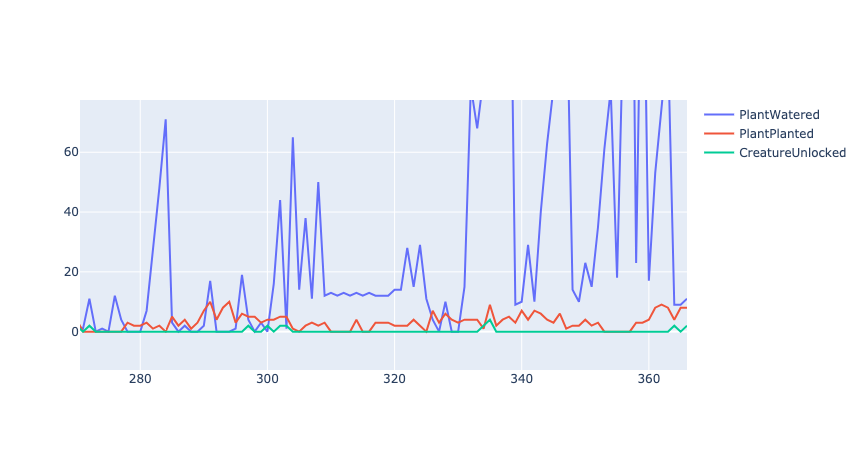

In [17]:
# subdf = alldf[alldf["eventKey"] == "CardPlacedInMachine"]
timeWindow = 60
binCount = (max(subdf["timeEpoch"]) - min(subdf["timeEpoch"])) / timeWindow

def makeBin(sdf, event = ""):
    if event != "":
        sdf = sdf[sdf["eventKey"] == event]
    ct = pd.cut(sdf["timeEpoch"], binCount)
    bins = sdf["timeEpoch"].groupby(ct).count()
    bb = bins.tolist()
    bAct = {"x": list(range(len(bb))), "y": bb, "name": event}
    return bAct

# ct = pd.cut(subdf["timeEpoch"], binCount)
# cardct = pd.cut(cardDf["timeEpoch"], binCount)

# df.groupby(pd.cut(df["B"], np.arange(0, 1.0+0.155, 0.155))).sum()
# actionBins = subdf["timeEpoch"].groupby(ct).count()
# cardBins = cardDf["timeEpoch"].groupby(cardct).count()
# screenChange = makeBin(subdf)
# cardChange = makeBin(cardDf)
# treasureOpen = makeBin(treasureOpendf)
# plating

# PlantWatered, PlantPlanted, RainbowPlantPlanted, PlantStateChanged, CreatureUnlocked

# ['PlantWatered' 'CreatureStateChanged' 'PlantStateChanged'
#  'TreasureDespawned' 'TreasureSpawned' 'GameStart' 'CreatureUnlocked'
#  'CreatureSelected' 'FlagMoved' 'FlagPlaced' 'CurrentScreenChanged'
#  'CardPlacedInMachine' 'CreatureSpawned' 'PlantPlanted'
#  'CreatureDeselected' 'CreatureDespawned' 'LeafyOrbFilled'
#  'CreatureLocked' 'MushroomOrbFilled' 'TreasureOpened'
#  'SeedPacketCountChanged' 'FlagCancelled' 'WoodyOrbFilled' 'AllOrbsFilled'
#  'CardPlacedInTray' 'CardSwapped' 'RainbowPlantPlanted']

# flagMove = makeBin(flagDf)

# cardmakeBin(subdf)

# screenChange = {"x": list(range(len(ab))), "y": ab}
# cardChange = {"x": list(range(len(cb))), "y": cb}

# data = [screenChange, stateChange]
# data = [screenChange, cardChange, treasureOpen, flagMove]
data = [makeBin(alldf, "PlantWatered"), makeBin(alldf, "PlantPlanted"), makeBin(alldf, "CreatureUnlocked")]


iplot(data, filename='normalized histogram')

In [ ]:
timeGaps = df[df["eventKey"].str.match("FlagMoved") | df["eventKey"].str.match("CardPlacedInMachine")]["timeEpoch"].diff()
# binCount = 
ct = pd.cut(timeGaps, 20000)
bins = timeGaps.groupby(ct).count()
bb = bins.tolist()

gaps = {"x": list(range(len(bb))), "y": bb}


iplot([gaps], filename='time gaps histogram')

In [ ]:
bins